<a href="https://colab.research.google.com/github/urza3tar3/ai/blob/main/digits11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn 

from matplotlib.image import imread


In [ ]:
import matplotlib as mpl
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [ ]:
df =pd.DataFrame(np.load("digits.npy"))
df.shape
df.head()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


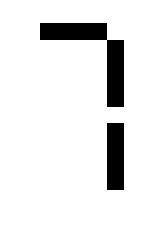

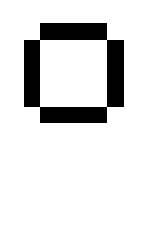

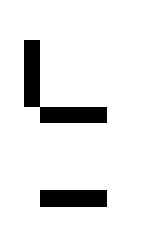

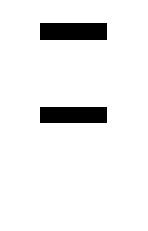

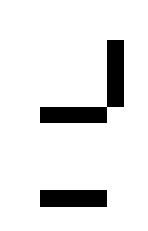

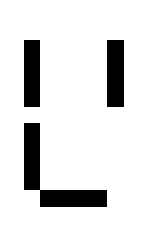

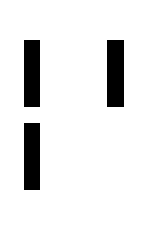

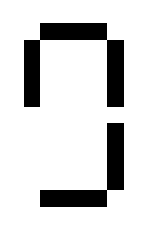

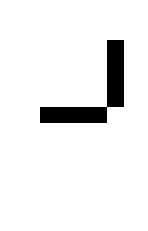

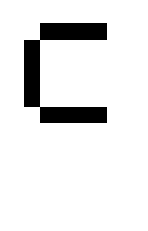

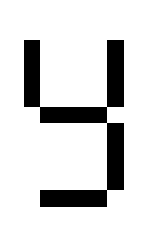

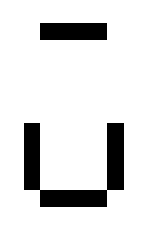

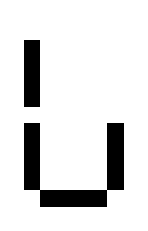

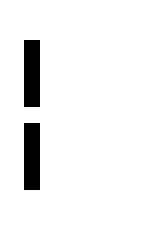

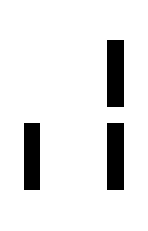

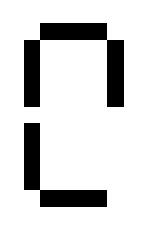

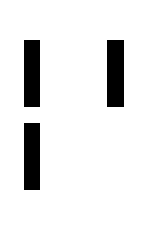

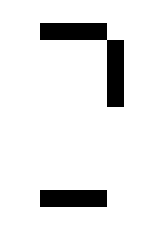

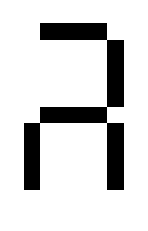

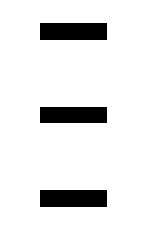

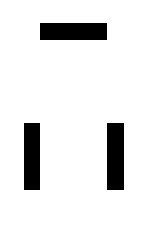

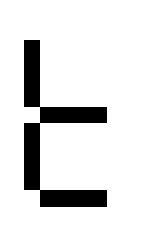

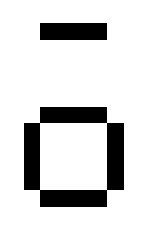

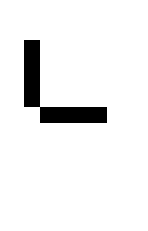

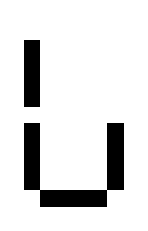

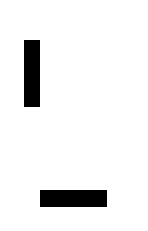

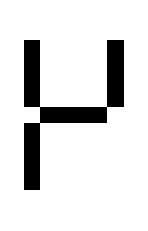

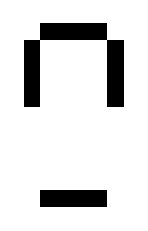

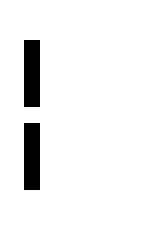

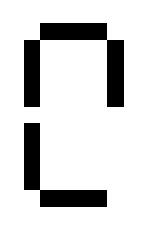

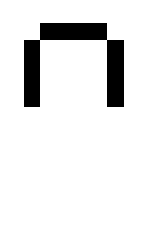

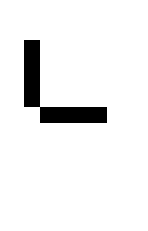

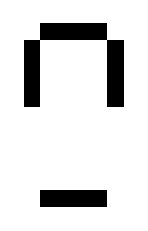

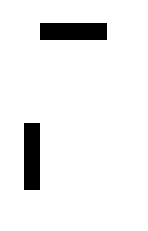

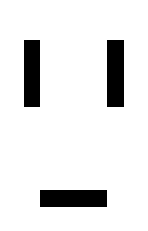

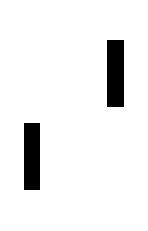

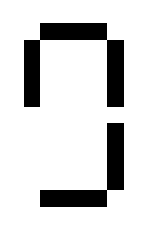

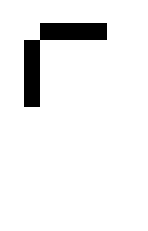

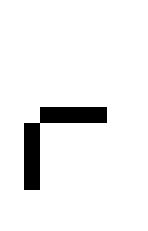

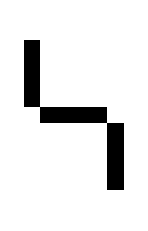

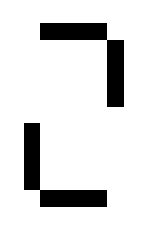

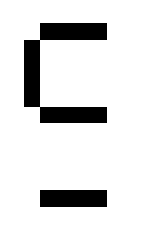

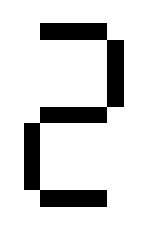

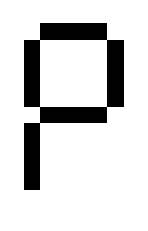

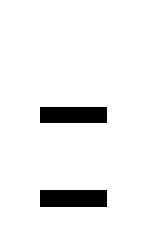

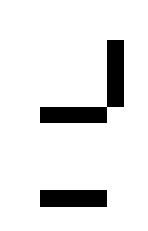

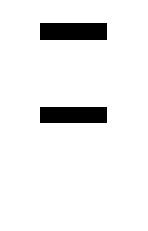

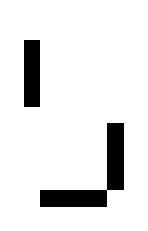

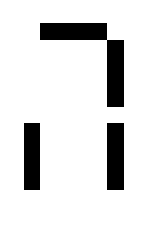

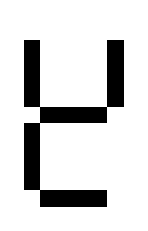

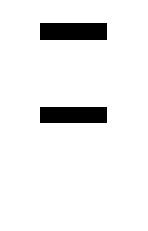

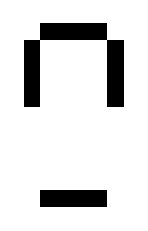

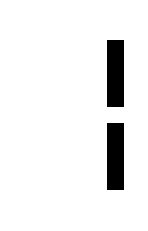

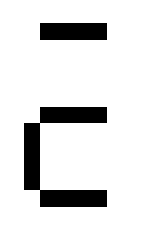

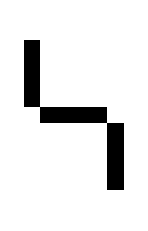

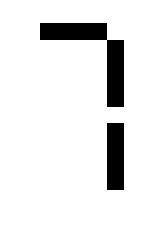

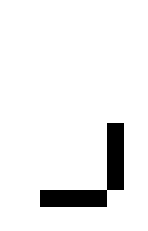

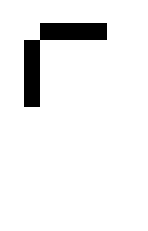

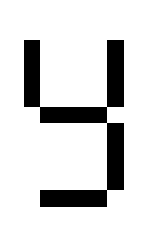

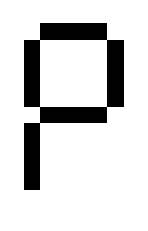

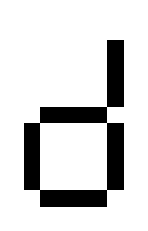

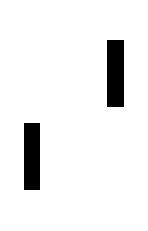

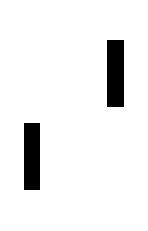

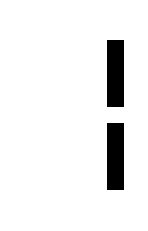

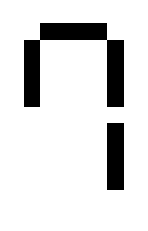

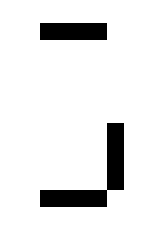

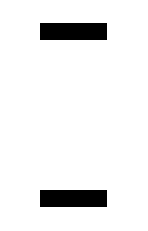

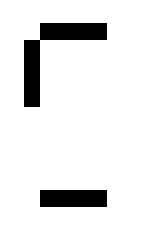

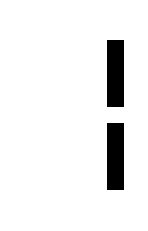

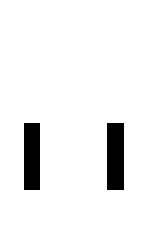

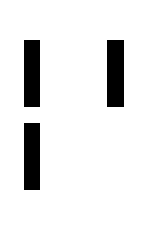

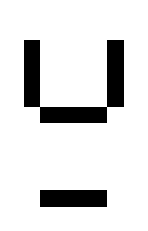

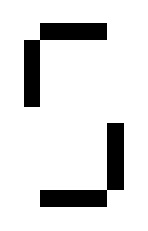

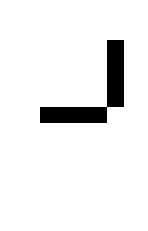

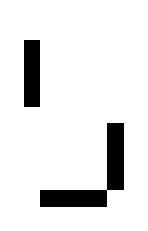

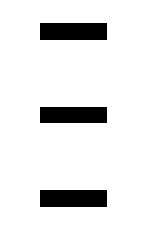

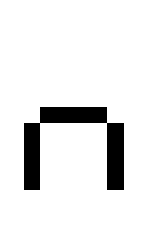

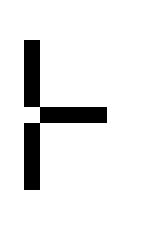

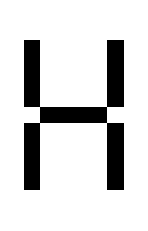

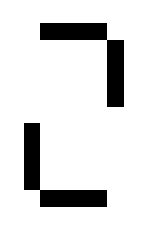

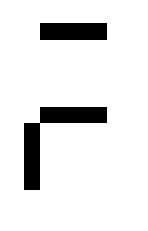

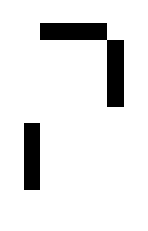

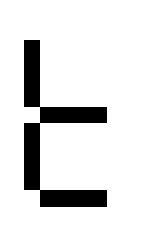

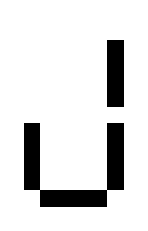

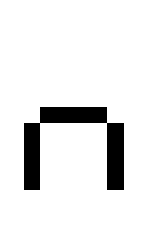

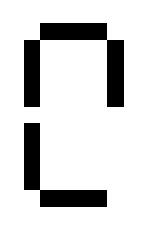

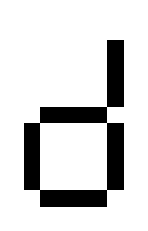

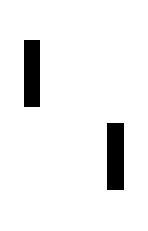

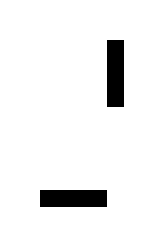

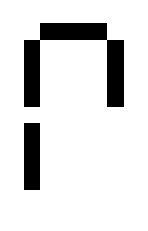

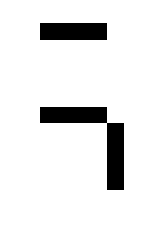

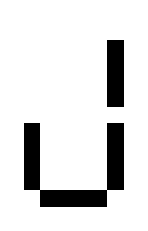

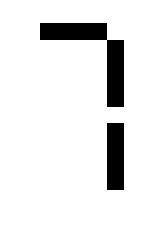

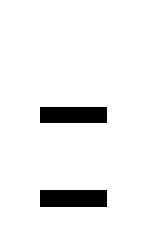

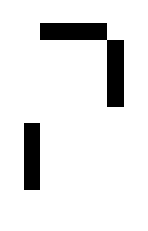

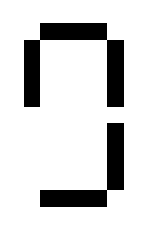

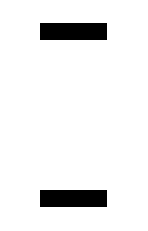

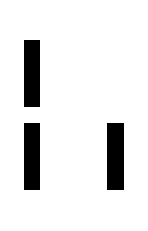

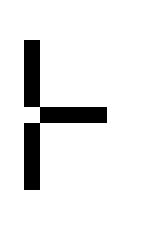

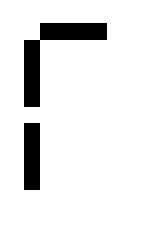

In [ ]:

for i in range(0,100):
  some_digit = np.array(df.iloc[i])
  some_digit_img = some_digit.reshape(13,8)
  plt.imshow(some_digit_img , cmap="binary")
  plt.axis("off")
  plt.show()

In [ ]:
model = NMF(n_components=10, random_state=5)
 
# Fit the model to TF-IDF
model.fit(df)
 
# Transform the TF-IDF: nmf_features
nmf_features = model.transform(df)
nmf_features2= pd.DataFrame(nmf_features)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


In [ ]:
for i in range(0,100):
  some_digit = np.array(nmf_features2.iloc[i])
  some_digit_img = some_digit.reshape((8,13))
  plt.imshow(some_digit_img , cmap="binary")
  plt.axis("off")
  plt.show()
  

ValueError: ignored

In [ ]:
df.shape

(100, 104)

In [ ]:
nmf_features.shape

(100, 10)

In [ ]:
model.components_.shape

(10, 104)

In [ ]:
components_df = pd.DataFrame(model.components_, columns=vect.get_feature_names())
components_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


NotFittedError: ignored

In [ ]:
for topic in range(df.shape[0]):
    tmp = df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
10    1
11    1
12    1
13    1
22    1
30    1
38    1
46    1
62    1
70    1
Name: 0, dtype: int64


For topic 2 the words with the highest value are:
10    1
11    1
12    1
13    1
17    1
22    1
25    1
30    1
33    1
38    1
Name: 1, dtype: int64


For topic 3 the words with the highest value are:
17    1
25    1
33    1
41    1
50    1
51    1
52    1
53    1
90    1
91    1
Name: 2, dtype: int64


For topic 4 the words with the highest value are:
10    1
11    1
12    1
13    1
50    1
51    1
52    1
53    1
0     0
1     0
Name: 3, dtype: int64


For topic 5 the words with the highest value are:
22    1
30    1
38    1
46    1
50    1
51    1
52    1
53    1
90    1
91    1
Name: 4, dtype: int64


For topic 6 the words with the highest value are:
17    1
22    1
25    1
30    1
33    1
38    1
41    1
46    1
57    1
65    1
Name: 5, dtype: int64


For topic 7 the words with the highest value are:
17    1
22    1
25    1
30

In [ ]:
pd.DataFrame(nmf_features).loc[44]

0    0.000000
1    0.681490
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.451464
7    0.000000
8    0.000000
9    0.000000
Name: 44, dtype: float64

In [ ]:
pd.DataFrame(nmf_features).loc[55].idxmax()

3

In [ ]:
  some_digit = np.array(nmf_features2.iloc[55]).reshape(3,18)
 
  plt.imshow(some_digit , cmap="binary")
  plt.axis("off")
  plt.show()

ValueError: ignored

In [ ]:
pd.DataFrame(nmf_features).idxmax(axis=1).value_counts()

1    42
3    26
2    19
5     9
4     3
0     1
dtype: int64